<a href="https://colab.research.google.com/github/llaygh/T5_camp_Amany/blob/main/Amany_week3_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

## Load the Data

In [ ]:
ta_data = pd.read_csv('Traffic_Accidents.csv')
ta_data.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
ta_data.columns.to_list()

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Year']

,Local_Authority_(District)
0,556
1,26
2,746
3,84
4,257
...,...
51995,365
51996,502
51997,516
51998,323


In [ ]:
ta_data.drop(ta_data[['Local_Authority_(District)','Local_Authority_(Highway)',
 '1st_Road_Class','1st_Road_Number','Road_Type','2nd_Road_Class',
 '2nd_Road_Number','Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities','Light_Conditions',
'Did_Police_Officer_Attend_Scene_of_Accident']],axis=1,inplace=True)

In [ ]:
ta_data.columns.to_list()

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Speed_limit',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Year']

In [ ]:
ta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    52000 non-null  float64
 1   Location_Northing_OSGR   52000 non-null  float64
 2   Longitude                52000 non-null  float64
 3   Latitude                 52000 non-null  float64
 4   Police_Force             52000 non-null  int64  
 5   Accident_Severity        51678 non-null  float64
 6   Number_of_Vehicles       52000 non-null  int64  
 7   Number_of_Casualties     50959 non-null  float64
 8   Date                     52000 non-null  object 
 9   Day_of_Week              52000 non-null  int64  
 10  Speed_limit              52000 non-null  int64  
 11  Weather_Conditions       52000 non-null  object 
 12  Road_Surface_Conditions  52000 non-null  object 
 13  Urban_or_Rural_Area      51912 non-null  float64
 14  Year                  

In [ ]:
ta_data[['Date','Year']].sample(5)

,Date,Year
2589,23/02/2014,2014
51832,05/01/2005,2005
47683,21/11/2011,2011
14513,04/08/2006,2006
23338,21/08/2011,2011


In [ ]:
ta_data.drop(columns=['Date'],inplace=True)

In [ ]:
ta_data.shape

(52000, 14)

In [ ]:
ta_data.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Day_of_Week,0
Speed_limit,0


In [ ]:
ta_data.duplicated().sum()

45

In [ ]:
ta_data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,39.148558,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,14.212826,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,30.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,30.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,50.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,70.000000,3.000000,2014.000000


In [ ]:
ta_data.sample(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
45632,436509.0,565876.0,-1.430992,54.986169,10,3.0,2,1.0,2,30,Fine without high winds,Dry,1.0,2012
28528,369010.0,353600.0,-2.464075,53.078703,7,3.0,2,2.0,5,40,Fine without high winds,Wet/Damp,1.0,2012
23326,586988.0,187838.0,0.696095,51.558370,42,3.0,2,1.0,7,40,Fine without high winds,Dry,1.0,2014
5547,334340.0,396260.0,-2.990385,53.458971,5,3.0,2,1.0,6,30,Fine without high winds,Dry,1.0,2012
751,364350.0,173930.0,-2.514585,51.463162,52,3.0,2,1.0,4,30,Fine without high winds,Dry,1.0,2009
43512,499250.0,368960.0,-0.515357,53.208432,32,3.0,4,4.0,7,60,Fine without high winds,Frost/Ice,2.0,2005
21633,436230.0,119050.0,-1.485411,50.969672,44,3.0,1,NaN,3,60,Fine without high winds,Dry,2.0,2005
18894,444060.0,315940.0,-1.348844,52.739276,33,NaN,2,1.0,7,30,Fine without high winds,Wet/Damp,1.0,2005
3996,501240.0,106720.0,-0.563180,50.851082,47,3.0,2,1.0,4,30,Fine without high winds,Dry,2.0,2009
21186,561130.0,184960.0,0.322103,51.540487,1,3.0,2,2.0,3,30,Fine without high winds,Dry,2.0,2006


In [ ]:
ta_data['Weather_Conditions'].value_counts()

,count
Weather_Conditions,
Fine without high winds,41662
Raining without high winds,6119
Other,1188
Unknown,968
Raining with high winds,718
Fine with high winds,584
Snowing without high winds,411
Fog or mist,283
Snowing with high winds,67


In [ ]:
ta_data[['Weather_Conditions','Road_Surface_Conditions']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Weather_Conditions       52000 non-null  object
 1   Road_Surface_Conditions  52000 non-null  object
dtypes: object(2)
memory usage: 812.6+ KB


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
# drop 'Unknown' values
ta_data = ta_data[ ta_data['Weather_Conditions'].str.contains( 'Unknown' )==False ]

In [ ]:
ta_data = ta_data[ ta_data['Road_Surface_Conditions'].str.contains( 'Unknown' )==False ]

In [ ]:
ta_data['Weather_Conditions'].value_counts()

,count
Weather_Conditions,
Fine without high winds,41662
Raining without high winds,6119
Other,1188
Raining with high winds,718
Fine with high winds,584
Snowing without high winds,411
Fog or mist,283
Snowing with high winds,67


In [ ]:
ta_data['Weather_Conditions']=ta_data['Weather_Conditions'].astype('category').cat.codes

In [ ]:
ta_data['Weather_Conditions'].info()

<class 'pandas.core.series.Series'>
Index: 31560 entries, 0 to 51999
Series name: Weather_Conditions
Non-Null Count  Dtype
--------------  -----
31560 non-null  int8 
dtypes: int8(1)
memory usage: 277.4 KB


In [ ]:
ta_data =ta_data.dropna()

In [ ]:
ta_data.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
Speed_limit,0


In [ ]:
ta_data=ta_data.drop_duplicates()
ta_data.duplicated().sum()

0

<ipython-input-89-375eefb21565>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(13, 3, i)


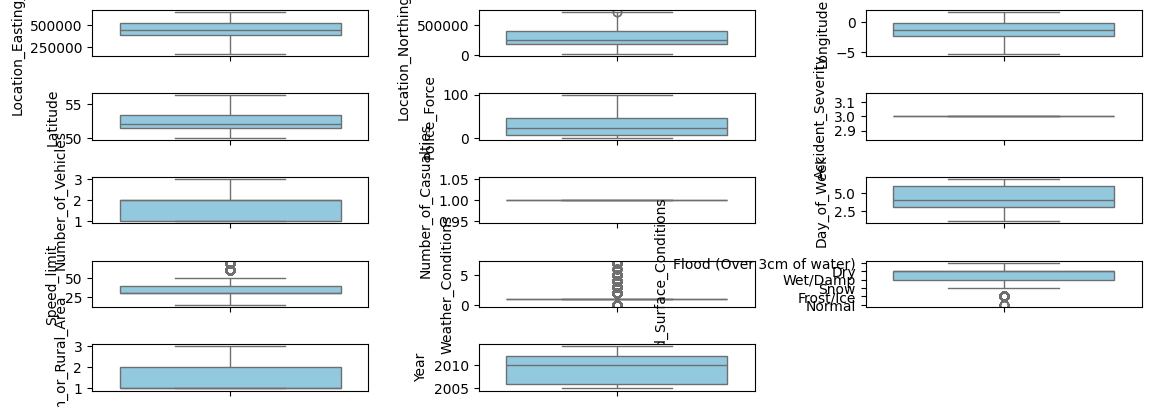

In [ ]:
# OUTLIERS
# plot styling
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
# this loop gonna plot each column
for i, column in enumerate(ta_data.columns, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(ta_data[column], color='skyblue')

In [ ]:
# remove the outliers using IQR - for each column

outliers_columns = ['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude','Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Weather_Conditions',
 'Road_Surface_Conditions']

def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()

    for column in columns:

        if column in df_cleaned.select_dtypes(include='number').columns:
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        else:
            print(f"Column '{column}' is not numeric or does not exist in the DataFrame.")

    return df_cleaned


ta_data = remove_outliers_iqr(ta_data, outliers_columns)
print("\nDataFrame after removing outliers from specified columns:\n", ta_data)



Column 'Weather_Conditions' is not numeric or does not exist in the DataFrame.
Column 'Road_Surface_Conditions' is not numeric or does not exist in the DataFrame.

DataFrame after removing outliers from specified columns:
        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
6                   418370.0                563150.0  -1.714623  54.962668   
7                   424700.0                562370.0  -1.615830  54.955386   
...                      ...                     ...        ...        ...   
51990               445720.0                112570.0  -1.351076  50.910730   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030 

<ipython-input-81-8b984cc80be7>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(13, 3, i)


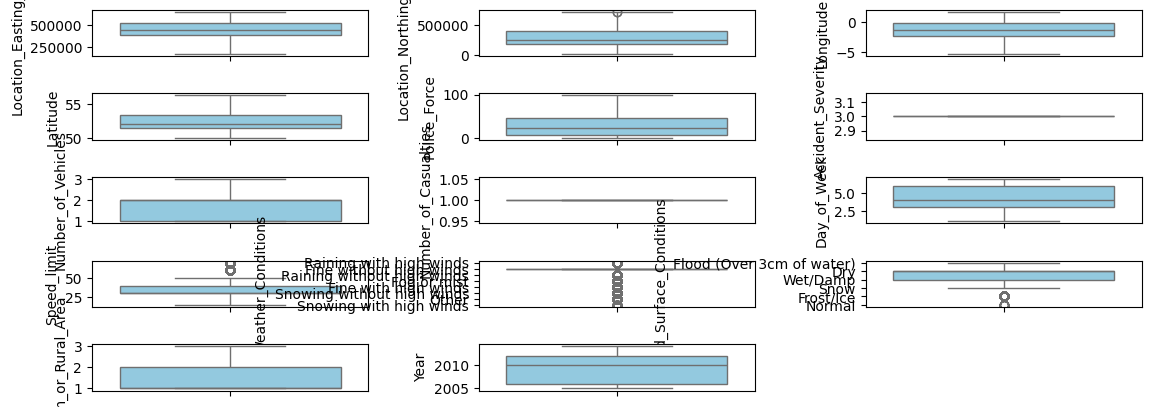

In [ ]:
# plot styling
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
# this loop gonna plot each column
for i, column in enumerate(ta_data.columns, 1):
    plt.subplot(13, 3, i)
    sns.boxplot(ta_data[column], color='skyblue')

In [ ]:
ta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31560 entries, 0 to 51999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    31560 non-null  float64
 1   Location_Northing_OSGR   31560 non-null  float64
 2   Longitude                31560 non-null  float64
 3   Latitude                 31560 non-null  float64
 4   Police_Force             31560 non-null  int64  
 5   Accident_Severity        31560 non-null  float64
 6   Number_of_Vehicles       31560 non-null  int64  
 7   Number_of_Casualties     31560 non-null  float64
 8   Day_of_Week              31560 non-null  int64  
 9   Speed_limit              31560 non-null  int64  
 10  Weather_Conditions       31560 non-null  int8   
 11  Road_Surface_Conditions  31560 non-null  object 
 12  Urban_or_Rural_Area      31560 non-null  float64
 13  Year                     31560 non-null  int64  
dtypes: float64(7), int64(5), in

In [ ]:
#ONE - HOT - ECODER
ta_data['Road_Surface_Conditions'].value_counts()

,count
Road_Surface_Conditions,
Dry,21972
Wet/Damp,8602
Frost/Ice,691
Snow,240
Flood (Over 3cm of water),40
Normal,15


In [ ]:
ta_data = pd.get_dummies(ta_data, columns = ['Road_Surface_Conditions'])

In [ ]:
ta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31560 entries, 0 to 51999
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Location_Easting_OSGR                              31560 non-null  float64
 1   Location_Northing_OSGR                             31560 non-null  float64
 2   Longitude                                          31560 non-null  float64
 3   Latitude                                           31560 non-null  float64
 4   Police_Force                                       31560 non-null  int64  
 5   Accident_Severity                                  31560 non-null  float64
 6   Number_of_Vehicles                                 31560 non-null  int64  
 7   Number_of_Casualties                               31560 non-null  float64
 8   Day_of_Week                                        31560 non-null  int64  
 9   Speed_limit

In [ ]:
# SCALING
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ta_data)

In [ ]:
# PCA
n_components = 0.9
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(scaled_data)

pca_data = pd.DataFrame(x_pca)
print(pca_data)

             0         1         2         3         4         5         6   \
0     -0.176212  3.785561  3.898084  2.481302  3.001249  3.717147  0.892928   
1     -2.019722 -0.394680 -0.588840  0.125578 -0.052299  0.037946 -0.868808   
2      0.366357 -1.333853  0.387801 -2.622778  0.135874  0.422698 -0.565723   
3      0.940287 -1.993500 -1.299481  1.207985 -1.759028  0.435905 -0.322254   
4      1.020054 -1.955933 -1.376173  1.482251 -0.099790 -0.205255  0.342037   
...         ...       ...       ...       ...       ...       ...       ...   
31555 -1.382236 -0.556221  0.175441 -1.676210  0.003337  0.328121  0.194279   
31556 -0.702882 -1.025868 -0.630155  0.124681 -0.078319  0.118511  0.767537   
31557 -0.809587  0.095131  2.620184 -0.119029  0.917388 -0.088381  0.457522   
31558 -0.459239  3.428601 -0.735076 -0.801075 -1.144216  0.382095 -0.124014   
31559 -0.587479 -0.101172  2.633660 -0.149875 -1.203533  0.616870 -0.376228   

              7          8         9         10  
0

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
pca_data.columns.to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

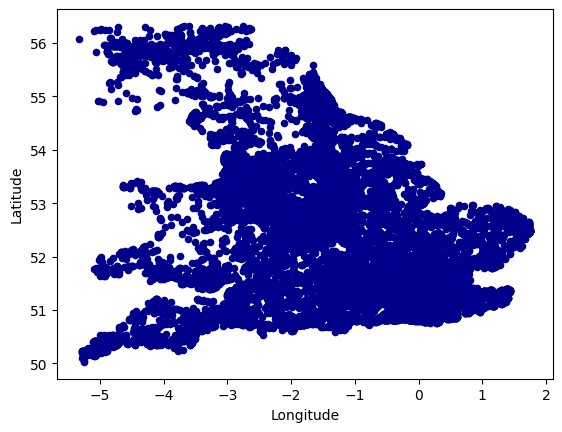

In [ ]:
ta_data.plot.scatter(x='Longitude',
                      y='Latitude',
                      c='DarkBlue')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

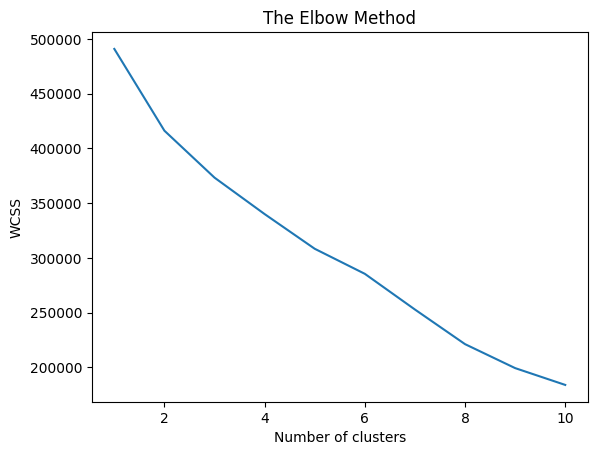

In [ ]:

%matplotlib inline
def calculate_elbow_and_draw_it(data):
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
calculate_elbow_and_draw_it(pca_data)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_data)
print(y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 2 1 ... 2 0 2]


In [ ]:

# Calculate the silhouette score
sil_score = silhouette_score(pca_data, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.15746505245149944


## Plot the data points with their predicted cluster center

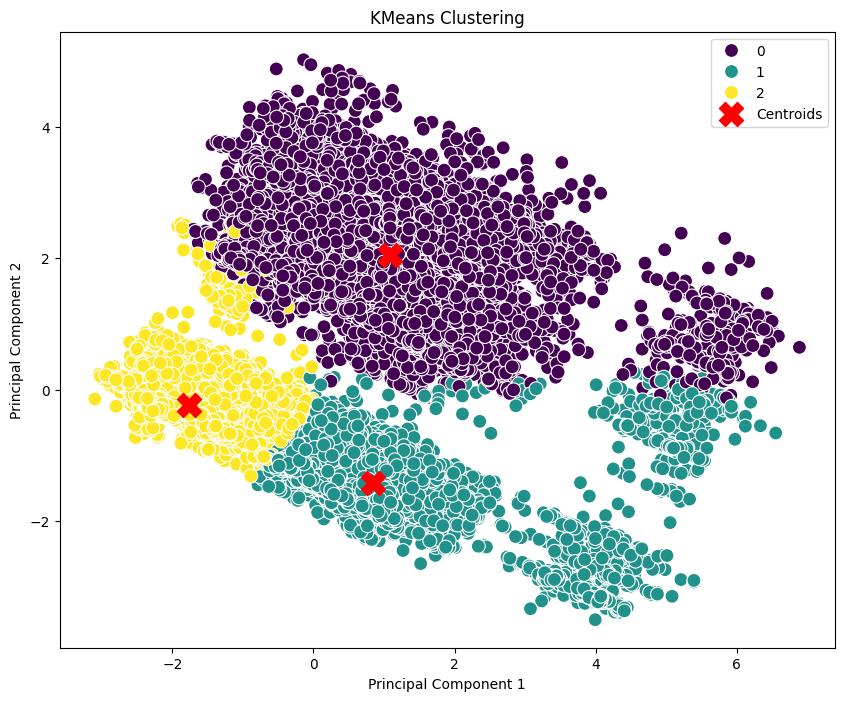

In [ ]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=pca_data.iloc[:, 0],
    y=pca_data.iloc[:, 1],
    hue=y_kmeans,
    palette='viridis',
    marker='o',
    s=100,
    edgecolor='w'
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?